In [53]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Options
pd.set_option('precision', 2)
%matplotlib inline

In [3]:
# CONSTANTS
DOW_ORDER =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MAX_MINUTES = 60 * 5

In [55]:
clean_df = (
    pd.read_csv('data/clean_data.csv')
    .assign(
        day_of_week=lambda d: pd.to_datetime(d.date).dt.dayofweek,
        day_name=lambda d: pd.to_datetime(d.date).dt.day_name(),
        log_SPOSTMIN=lambda d: np.log(d.SPOSTMIN),
        log_SACTMIN=lambda d: np.log(d.SACTMIN),
    )
)

print(clean_df.shape)
clean_df.columns

/home/jongbin/.virtualenvs/jcha/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11,20,23,24,33,35,37,39,165,168,169,170,173,188) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/jongbin/.virtualenvs/jcha/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jongbin/.virtualenvs/jcha/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(630663, 204)


Index(['date', 'datetime', 'SACTMIN', 'SPOSTMIN', 'code', 'name', 'short_name',
       'land', 'opened_on', 'duration',
       ...
       'AKPRDDN', 'AKFIREN', 'AKSHWNGT', 'AKSHWNT1', 'AKSHWNT2', 'AKSHWNN',
       'day_of_week', 'day_name', 'log_SPOSTMIN', 'log_SACTMIN'],
      dtype='object', length=204)

In [56]:
open_days_df = clean_df[(clean_df.SPOSTMIN > 0) | (clean_df.SACTMIN > 0)]
actuals_df = open_days_df[(open_days_df.SACTMIN > 0) & (open_days_df.SACTMIN < MAX_MINUTES)]

# Summary and distribution

In [6]:
(
    open_days_df
    .loc[:, ['short_name', 'duration', 'SACTMIN', 'SPOSTMIN']]
    .groupby(['short_name', 'duration'])
    .describe()
)

SACTMIN                                         \
                                count   mean    std  min   25%   50%     75%   
short_name           duration                                                  
7 Dwarfs Train       3.0        803.0  35.66  28.63  1.0  18.0  27.0   43.50   
Alien Saucers        3.0        878.0  26.00  12.42  1.0  17.0  26.0   34.00   
DINOSAUR             4.0        786.0  21.12  15.61  1.0   9.0  17.0   28.75   
Expedition Everest   4.0        785.0  19.96  16.07  1.0   8.0  16.0   28.00   
Flight of Passage    6.0        667.0  72.93  41.42  3.0  39.0  69.0  100.00   
Kilimanjaro Safaris  20.0       600.0  27.05  22.40  1.0  10.0  21.0   39.00   
Na'vi River          5.0        804.0  30.99  23.50  1.0  13.0  25.0   43.25   
Pirates of Caribbean 15.0      1457.0  18.81  12.95  1.0   9.0  17.0   27.00   
Rock Coaster         2.0        461.0  27.84  25.24  1.0  10.0  21.0   36.00   
Slinky Dog           3.0       1361.0  39.51  24.71  1.0  20.0  34.0   56.00   
Soarin'              5.0       1214.0  25.51  15.21  1.0  14.0  23.0   33.00   
Spaceship Earth      16.0       389.0  11.24  10.59  1.0   3.0   8.0   16.00   
Splash Mountain      18.0       677.0  24.41  21.32  1.0   9.0  19.0   33.00   
Toy Story Mania!     8.0       1484.0  29.72  19.82  1.0  14.0  26.0   42.00   

                                     SPOSTMIN                             \
                                 max    count    mean    std  min    25%   
short_name           duration                                              
7 Dwarfs Train       3.0       217.0  44752.0   84.43  38.00  5.0   55.0   
Alien Saucers        3.0        70.0  40766.0   31.30  15.76  5.0   20.0   
DINOSAUR             4.0        94.0  37334.0   31.90  20.52  5.0   15.0   
Expedition Everest   4.0       112.0  39691.0   40.02  26.60  5.0   20.0   
Flight of Passage    6.0       234.0  43073.0  131.38  49.50  5.0  105.0   
Kilimanjaro Safaris  20.0      137.0  35885.0   54.91  30.71  5.0   30.0   
Na'vi River          5.0       173.0  42199.0   60.66  29.51  5.0   45.0   
Pirates of Caribbean 15.0       97.0  43810.0   28.52  17.88  5.0   10.0   
Rock Coaster         2.0       160.0  39109.0   68.83  36.70  5.0   40.0   
Slinky Dog           3.0       187.0  40603.0   75.09  29.95  5.0   55.0   
Soarin'              5.0       108.0  41032.0   40.11  22.67  5.0   25.0   
Spaceship Earth      16.0       81.0  38186.0   20.40  15.85  5.0    5.0   
Splash Mountain      18.0      156.0  40138.0   49.34  36.50  5.0   15.0   
Toy Story Mania!     8.0       117.0  40955.0   48.33  26.09  5.0   30.0   

                                                    
                                 50%    75%    max  
short_name           duration                       
7 Dwarfs Train       3.0        85.0  110.0  240.0  
Alien Saucers        3.0        35.0   40.0  130.0  
DINOSAUR             4.0        30.0   45.0  255.0  
Expedition Everest   4.0        35.0   55.0  180.0  
Flight of Passage    6.0       130.0  165.0  295.0  
Kilimanjaro Safaris  20.0       55.0   75.0  185.0  
Na'vi River          5.0        60.0   80.0  210.0  
Pirates of Caribbean 15.0       25.0   40.0  180.0  
Rock Coaster         2.0        65.0   95.0  230.0  
Slinky Dog           3.0        75.0   95.0  250.0  
Soarin'              5.0        35.0   50.0  240.0  
Spaceship Earth      16.0       15.0   30.0  125.0  
Splash Mountain      18.0       45.0   75.0  195.0  
Toy Story Mania!     8.0        45.0   65.0  220.0

## Posted wait-time boxplot per ride

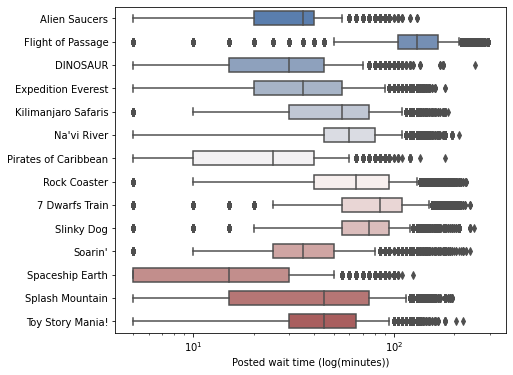

In [7]:
# Plot the orbital period with horizontal boxes
plt.figure(figsize=(7, 6))
ax = sns.boxplot(x='SPOSTMIN', y='short_name', data=open_days_df,
                 whis=[5, 95], width=.6, palette="vlag")
ax.set(xlabel='Posted wait time (log(minutes))', ylabel='')
ax.set_xscale('log')

# Relationships

## Wait times per day of week

### Actual wait times: biased observation of actuals

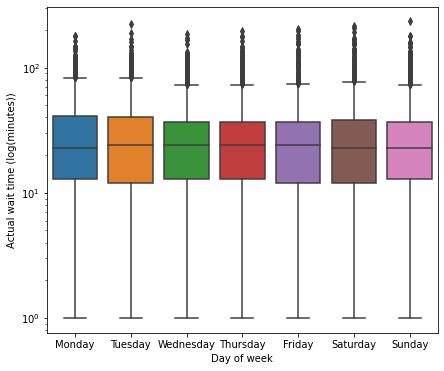

In [46]:
plt.figure(figsize=(7, 6))
g = sns.boxplot(x='day_of_week', y='SACTMIN', data=actuals_df, )
g = g.set(xlabel='Day of week', xticks=range(7), xticklabels=DOW_ORDER,
          ylabel='Actual wait time (log(minutes))', yscale='log')

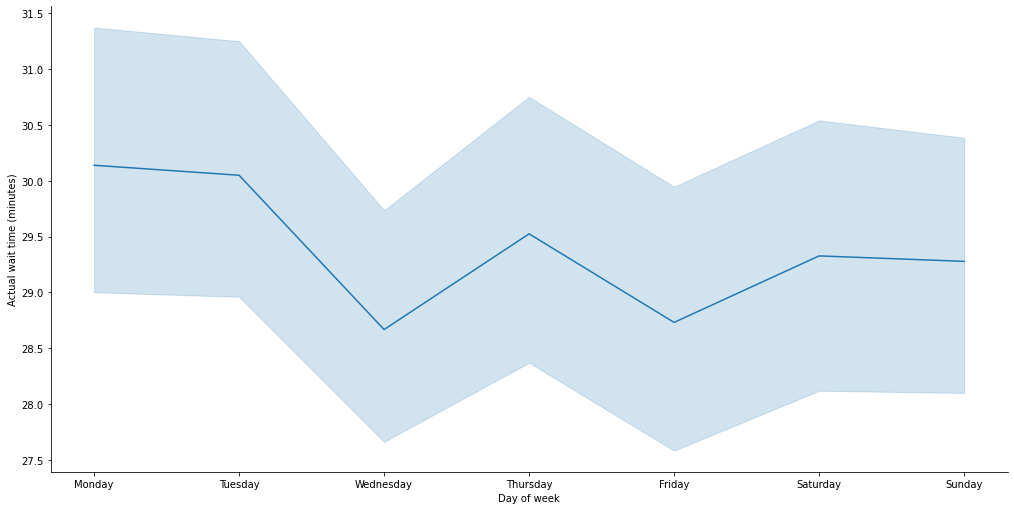

In [44]:
g = sns.relplot(x='day_of_week', y='SACTMIN', kind='line', data=actuals_df, height=7, aspect=2)
g = g.set(xlabel='Day of week', xticks=range(7), xticklabels=DOW_ORDER,
          ylabel='Actual wait time (minutes)')

### Posted wait times: complete observation of estimates

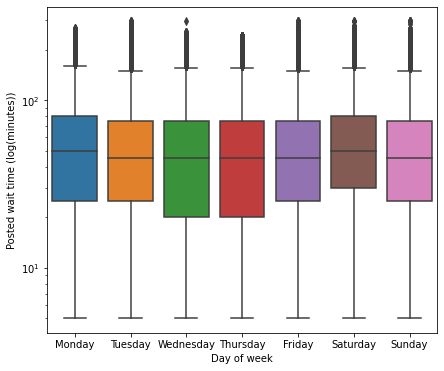

In [47]:
plt.figure(figsize=(7, 6))
g = sns.boxplot(x='day_of_week', y='SPOSTMIN', data=open_days_df, )
g = g.set(xlabel='Day of week', xticks=range(7), xticklabels=DOW_ORDER,
          ylabel='Posted wait time (log(minutes))', yscale='log')

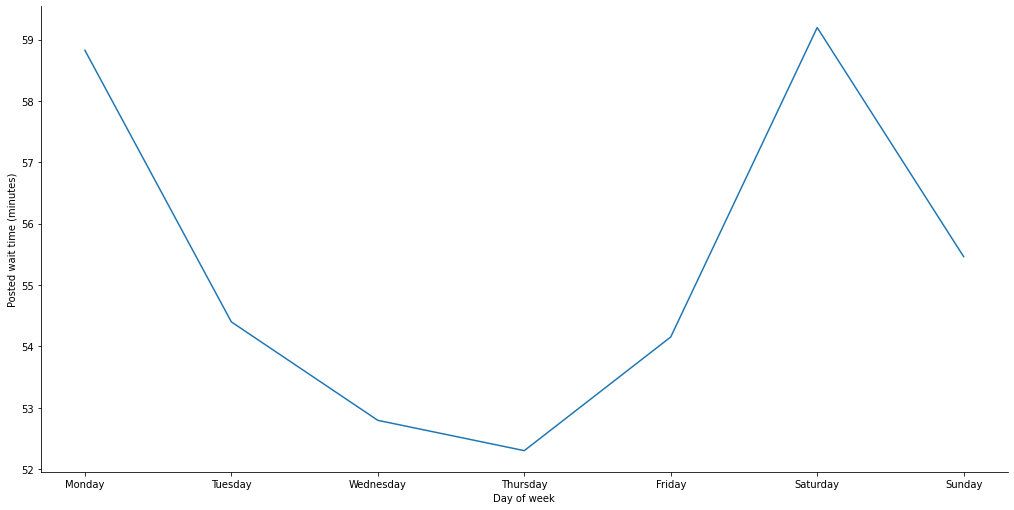

In [48]:
g = sns.relplot(x='day_of_week', y='SPOSTMIN', kind='line', data=open_days_df, height=7, aspect=2)
g = g.set(xlabel='Day of week', xticks=range(7), xticklabels=DOW_ORDER,
          ylabel='Posted wait time (minutes)')

In [36]:
seasons_map = (
    open_days_df
    .groupby('SEASON')
    ['date']
    .min()
    .reset_index()
)

# Seasons to exclude, for viz. purposes
exclude_seasons = ['CHRISTMAS PEAK', 'MARDI GRAS', 'JULY 4TH', 'JERSEY WEEK']
seasons_map = seasons_map[~seasons_map.SEASON.isin(exclude_seasons)]
seasons_map.sort_values('date')

,SEASON,date
0,CHRISTMAS,2019-01-02 00:00:00
16,WINTER,2019-01-10 00:00:00
9,MARTIN LUTHER KING JUNIOR DAY,2019-01-17 00:00:00
11,PRESIDENTS WEEK,2019-02-14 00:00:00
13,SPRING,2019-03-01 00:00:00
3,EASTER,2019-04-12 00:00:00
10,MEMORIAL DAY,2019-05-25 00:00:00
14,SUMMER BREAK,2019-07-01 00:00:00
12,SEPTEMBER LOW,2019-08-20 00:00:00
4,FALL,2019-09-17 00:00:00


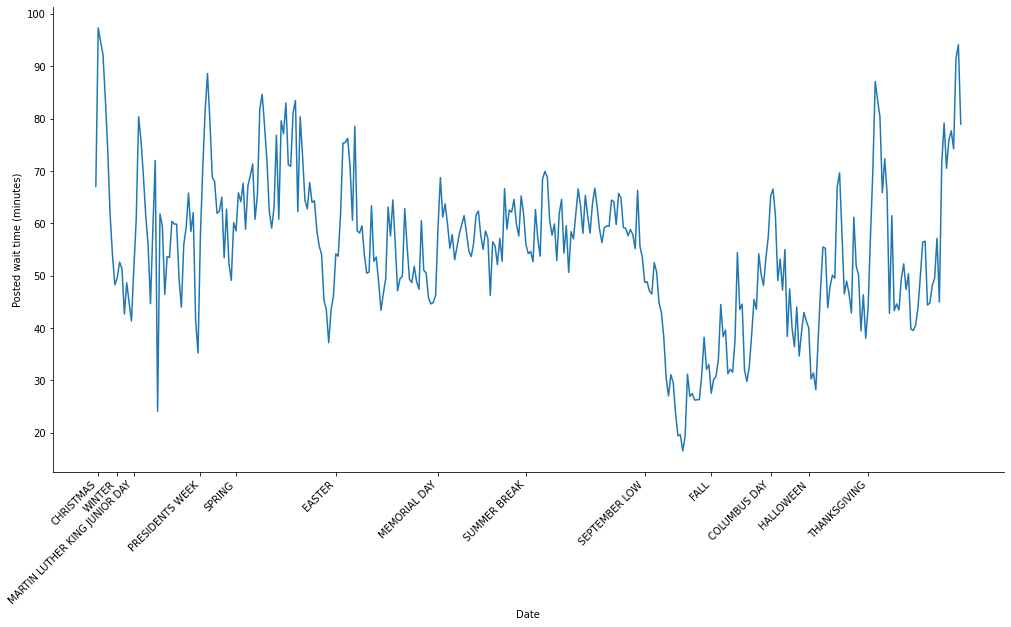

In [37]:
g = sns.relplot(x='date', y='SPOSTMIN', kind='line', data=open_days_df, height=7, aspect=2)
g = g.set(xlabel='Date', ylabel='Posted wait time (minutes)', xticks=seasons_map.date, xticklabels=seasons_map.SEASON)
g = g.set_xticklabels(rotation=45, horizontalalignment='right')

## Wait times by weather

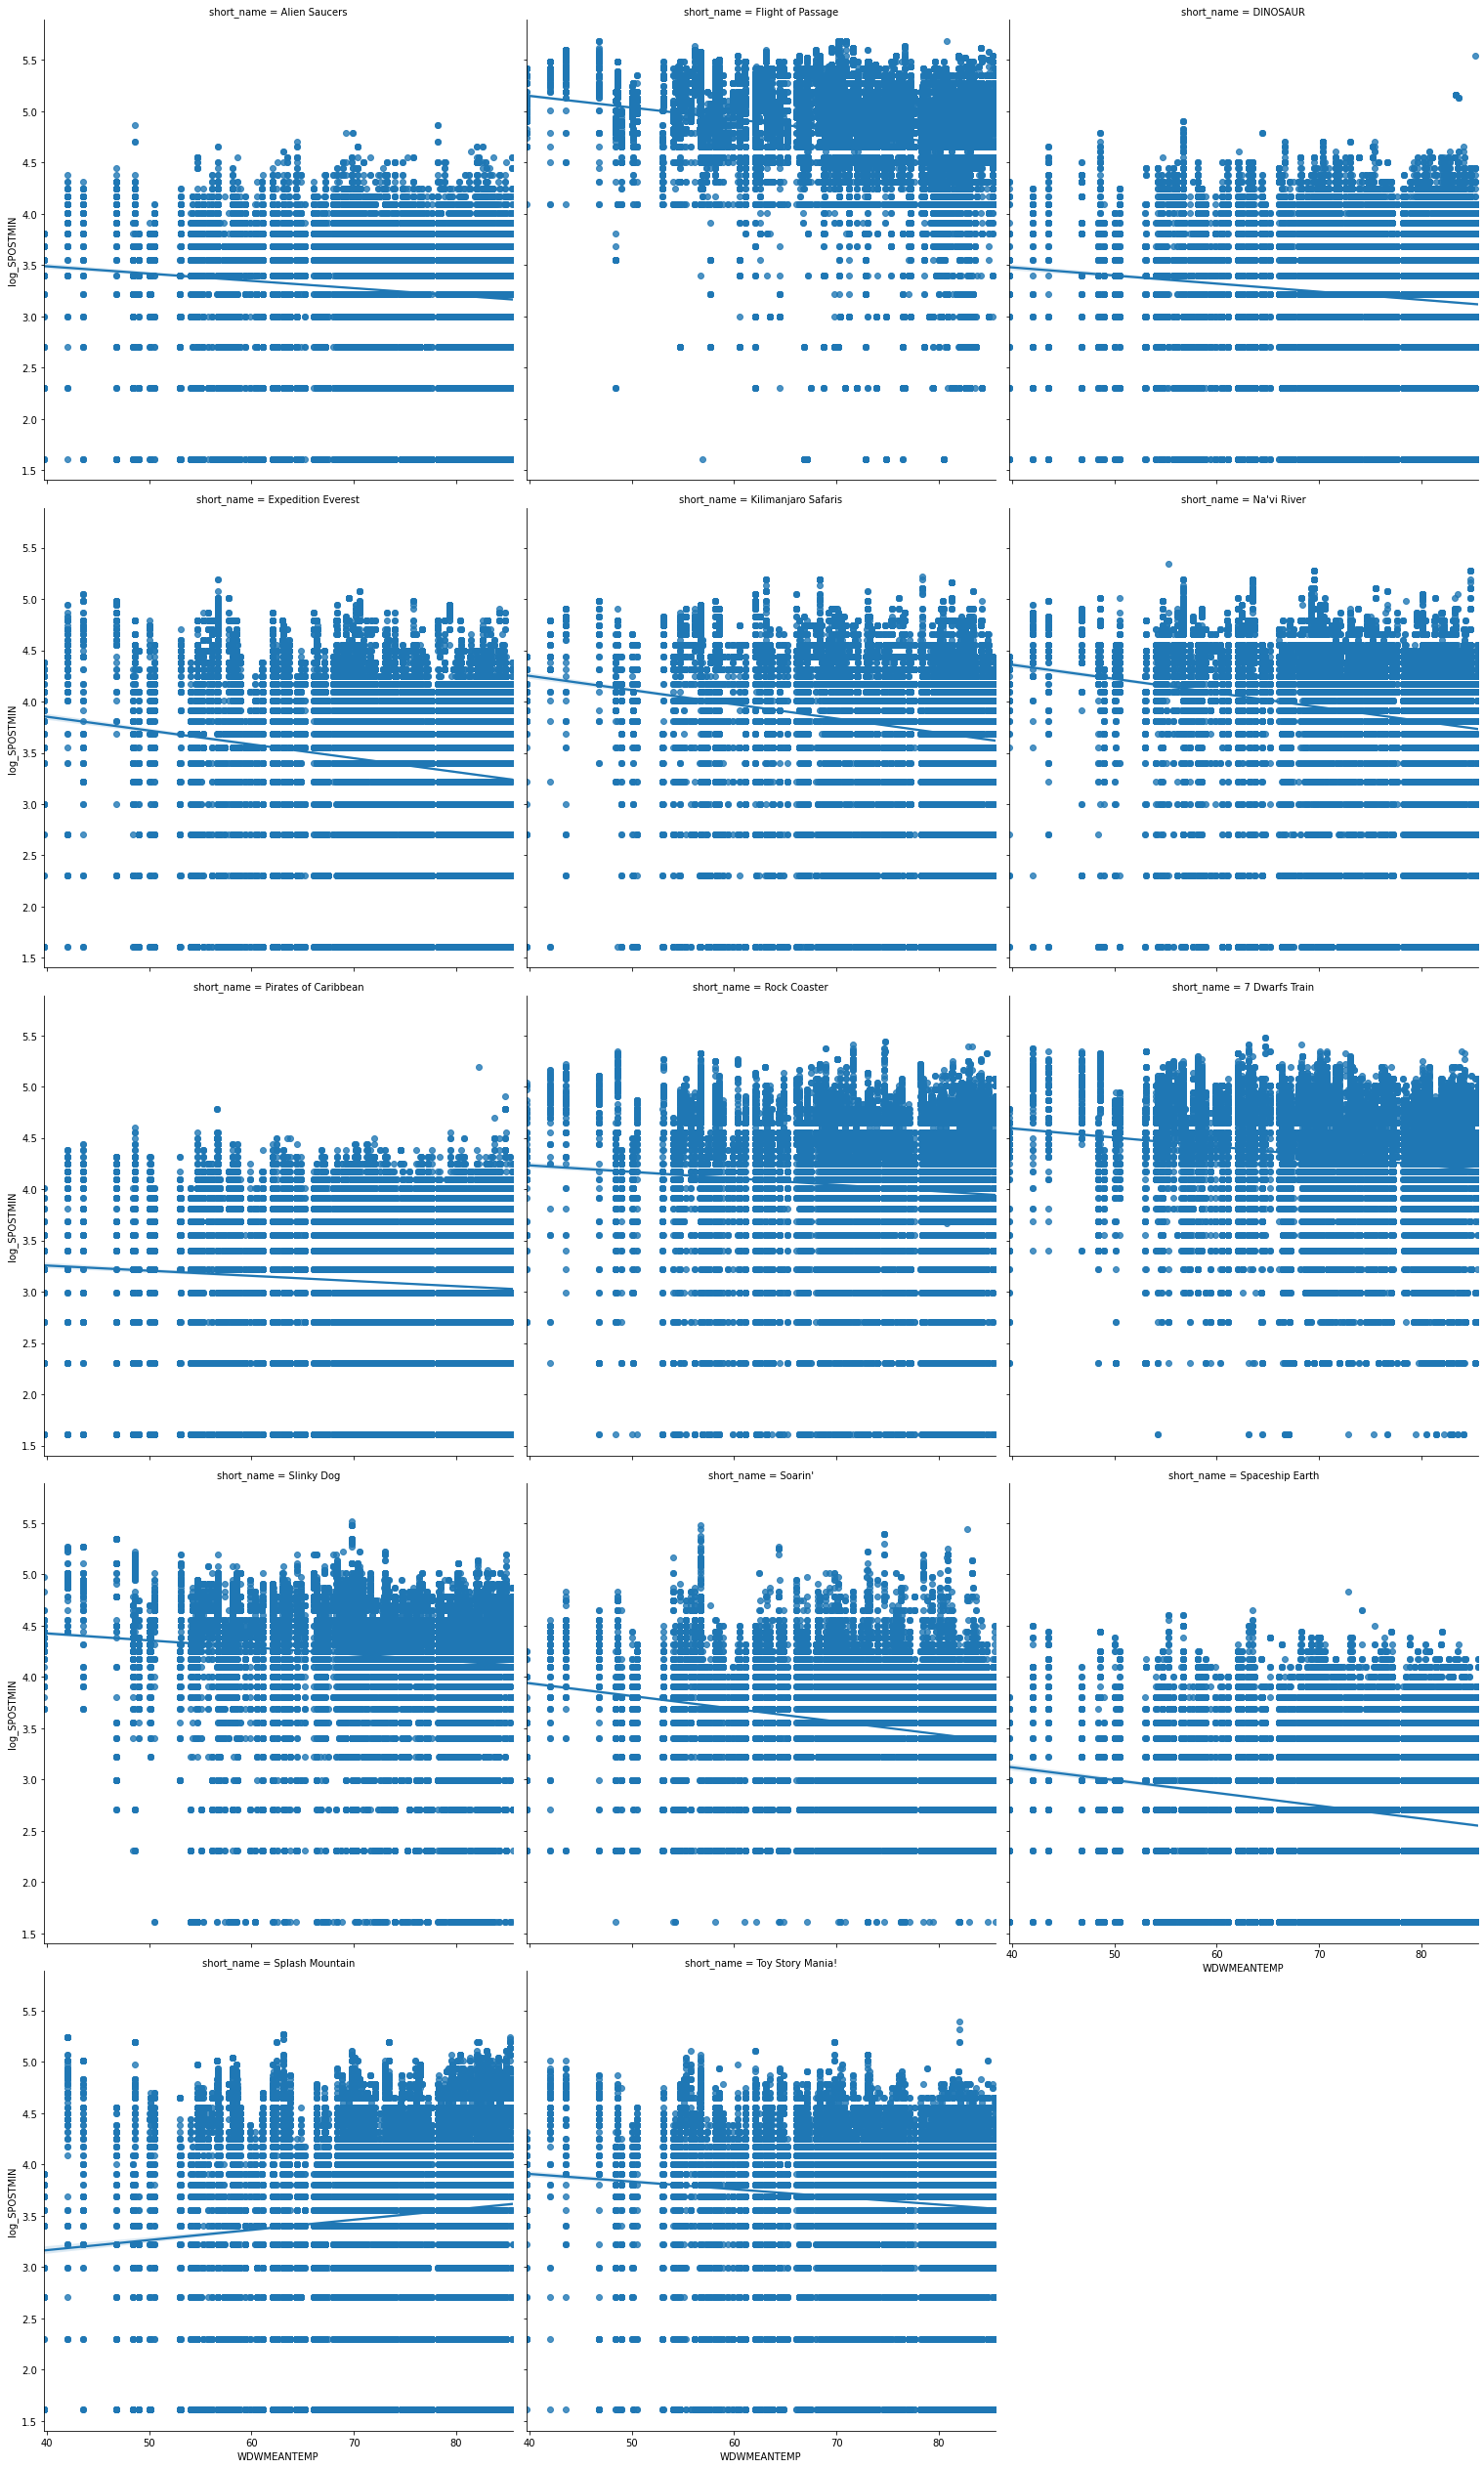

In [57]:
g = sns.lmplot(x='WDWMEANTEMP', y='log_SPOSTMIN', data=open_days_df,
               col='short_name', col_wrap=3, height=7)